# 1.Colab에 Mecab 설치
Mecab : 형태소 분석기

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 16.89 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 465 kB 41.2 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-12-04 10:11:01--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.1, 18.205.93.2, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.1|:443

# 2.네이버 쇼핑 리뷰 데이터 가져오기 및 전처리

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#데이터 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [ ]:
#훈련 데이터와 테스트 데이터 분리하기
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:5]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [ ]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 150000
테스트용 리뷰의 개수 : 50000


In [ ]:
train_data['reviews'][:5]

21743                다른 곳보다 싼 맛에 구입을 했습니다. 내구성은 별루인 것 같습니다.
124554    제품펼쳤을시 덜렁거리고 고정도 잘안되는것같고 제품 이음새 걸쇠부분등 마감처리가 안되...
10351                             유용하게 잘 쓰겠습니다 다양하게 잘 산것같아요
135164                       제품 별로 소분해서 보내주셨으면 참 좋았을 거 같네요.
49969                                            진짜 이뿌고 좋아용
Name: reviews, dtype: object

# 3.데이터 정제하기

In [ ]:
#데이터 정제하기

#훈련용 데이터 : 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

#테스트 데이터 : 한글과 공백을 제외하고 모두 제거
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

<ipython-input-8-fd5034e0c3da>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


ratings    0
reviews    0
label      0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 49995


<ipython-input-8-fd5034e0c3da>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [ ]:
train_data['reviews'][:5]

21743                  다른 곳보다 싼 맛에 구입을 했습니다 내구성은 별루인 것 같습니다
124554    제품펼쳤을시 덜렁거리고 고정도 잘안되는것같고 제품 이음새 걸쇠부분등 마감처리가 안되...
10351                             유용하게 잘 쓰겠습니다 다양하게 잘 산것같아요
135164                        제품 별로 소분해서 보내주셨으면 참 좋았을 거 같네요
49969                                            진짜 이뿌고 좋아용
Name: reviews, dtype: object

In [ ]:
#토큰화 및 불용어 제거 
mecab = Mecab()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

#훈련 데이터
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

#테스트 데이터
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

[('네요', 31898), ('는데', 20303), ('안', 19749), ('어요', 14846), ('있', 13150), ('너무', 13108), ('했', 11758), ('배송', 9832), ('좋', 9766), ('같', 8993), ('거', 8909), ('구매', 8852), ('어', 8775), ('없', 8770), ('아요', 8624), ('습니다', 8432), ('되', 8390), ('그냥', 8380), ('잘', 8031), ('않', 7916)]
[('좋', 39592), ('아요', 21104), ('네요', 19841), ('어요', 18602), ('잘', 18535), ('구매', 16238), ('습니다', 13515), ('있', 12421), ('배송', 12323), ('는데', 11684), ('합니다', 9790), ('했', 9733), ('먹', 9611), ('재', 9361), ('너무', 8389), ('같', 7820), ('만족', 7297), ('거', 6556), ('쓰', 6367), ('어', 6289)]
긍정 리뷰의 평균 길이 : 13.584845977256954
부정 리뷰의 평균 길이 : 17.038148010016517


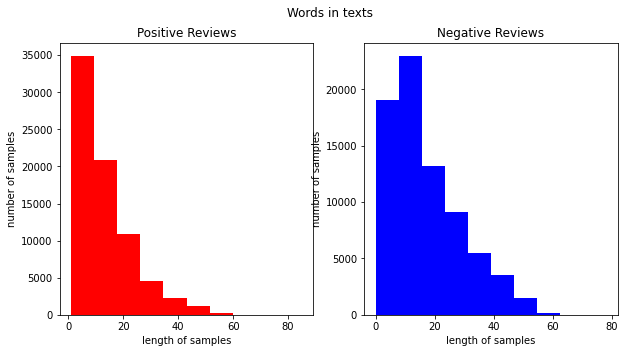

In [ ]:
#단어와 길이 분포 확인하기
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

#부정리뷰
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20)) #빈도수가 높은 상위 20개 단어 출력

#긍정리뷰
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
#정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 40103
등장 빈도가 1번 이하인 희귀 단어의 수: 18286
단어 집합에서 희귀 단어의 비율: 45.5975862154951
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7960863513811789


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 21819


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 85
리뷰의 평균 길이 : 15.313246666666666


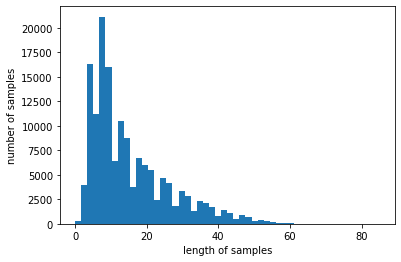

In [ ]:
#패딩
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.99866666666667


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# 4.GRU 리뷰 감성 분류 모델 훈련



In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)#epochs 15

Epoch 1/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2679 - acc: 0.8988
Epoch 1: val_acc improved from -inf to 0.91773, saving model to best_model.h5
1875/1875 [==============================] - 324s 172ms/step - loss: 0.2679 - acc: 0.8988 - val_loss: 0.2279 - val_acc: 0.9177
Epoch 2/15
1875/1875 [==============================] - ETA: 0s - loss: 0.2133 - acc: 0.9230
Epoch 2: val_acc improved from 0.91773 to 0.92053, saving model to best_model.h5
1875/1875 [==============================] - 323s 172ms/step - loss: 0.2133 - acc: 0.9230 - val_loss: 0.2180 - val_acc: 0.9205
Epoch 3/15
1875/1875 [==============================] - ETA: 0s - loss: 0.1969 - acc: 0.9296
Epoch 3: val_acc improved from 0.92053 to 0.92600, saving model to best_model.h5
1875/1875 [==============================] - 323s 172ms/step - loss: 0.1969 - acc: 0.9296 - val_loss: 0.2110 - val_acc: 0.9260
Epoch 4/15
1875/1875 [==============================] - ETA: 0s - loss: 0.1858 - acc: 0.9342
Epoch 4

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

1563/1563 [==============================] - 36s 23ms/step - loss: 0.2095 - acc: 0.9247

 테스트 정확도: 0.9247


In [ ]:

def sentiment_predict(new_sentence):
  original_sentence = new_sentence
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    #save reviews to excel file 1
    #df.append(new_sentence)
    f = open('/content/positive_reviews.txt','a')
    f.write(''.join(original_sentence)+'\n')
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))
    #df2.append(new_sentence)
    #save reviews to excel file 2
    f = open('/content/negative_reviews.txt','a')
    f.write(''.join(original_sentence)+'\n')
  f.close()

# 5.테스트 리뷰 뭉치 넣은 후 긍정, 부정 분류

In [ ]:
with open('/content/input_reviews.txt') as f:
    data = [line.strip() for line in f.readlines()]
    #lines = f.readlines()
    #lines = list(map(lambda s: s.strip(), lines))
    #sentiment_predict(lines)

for i in data :
  sentiment_predict(i)
  print(i)

Streaming output truncated to the last 5000 lines.
97.88% 확률로 긍정 리뷰입니다.
역시 에어팟이야 라는거 음질도좋고 일단은 불편하지가 않아서 좋아요
1/1 [==============================] - 0s 31ms/step
98.85% 확률로 긍정 리뷰입니다.
배송 빠르고 보증확인 잘되고 소리 아주 좋습니당~ 오!!
1/1 [==============================] - 0s 32ms/step
86.28% 확률로 긍정 리뷰입니다.
겔노트9에 사용 ~~ 통화품질이 좋아요. 저가형과 비교 불가
1/1 [==============================] - 0s 32ms/step
97.31% 확률로 긍정 리뷰입니다.
에어팟 잘받았습니다.생각만큼이나 착용감이나 음질이 좋아 매우 만족합니다. 한달을 기다린 보함이 있네요.
1/1 [==============================] - 0s 32ms/step
94.04% 확률로 긍정 리뷰입니다.
빠른 배송 감사합니다. 잃어버려서 눈물을 머금고 다시 구매 했네요. 하지만 다시 구매할 만큼 음질이 좋기도 합니다. TT
1/1 [==============================] - 0s 33ms/step
95.48% 확률로 긍정 리뷰입니다.
사운드가 좋네요. 생각보다 작아서 좋아요
1/1 [==============================] - 0s 32ms/step
98.36% 확률로 긍정 리뷰입니다.
아이가 넘 좋아라 합니다. 음질이 좋네요
1/1 [==============================] - 0s 51ms/step
97.20% 확률로 긍정 리뷰입니다.
좋아요~~ 음질 좋구 저렴하게 구입했어요
1/1 [==============================] - 0s 34ms/step
99.11% 확률로 긍정 리뷰입니다.
아이폰엔 아이팟2. 배송도 빠르고 이번에 세일해서 저렴하게 구입했습니다. 연결도

# 6.긍정,부정 리뷰 그룹 LDA 

In [ ]:
#긍정리뷰 데이터 로드
pos_data = pd.read_table('/content/positive_reviews.txt', names=['review'])

#부정리뷰 데이터 로드
neg_data = pd.read_table('/content/negative_reviews.txt', names=['review'])

In [ ]:
pos_data[:5]

,review
0,"배송은 4시 이전 주문 배송료로 바로 직전에 놔두고, 바로 정품 등록했는데 이상 없..."
1,아이폰과 아이패드를 둘 다 사용하고 심리적인 아이폰에서 음악을 듣거나 영상을 보다 ...
2,짐도 하루 포장일찍 오고 했어도 쭉 쪘어요 뽁뽁이로도 해주셔서 너무 감사했어요 친구...
3,배송이 너무 오래되어서 빨랐어요...금요일에 주문해서 땜주에 오랐습니다. 귀에서 위...
4,아이폰 7쓰고 에어팟 처음 나왔을 때 밥을 먹고 싶었지만 가격에 헥헥서 포기하고 살...


In [ ]:
neg_data[:5]

,review
0,2세대로 배송료를 부과하고 철가루와 흰색색 실리콘케이스도 잘 받았고 장기간 사용시 ...
1,다른 저렴한 곳도 표시합니다. 저항 조작일자 최신에 페이백으로 다시 받는 금액 생각...
2,기대했던 것이 완전 불편한 상품입니다. 하고 있는 것은 거리가 멀게 늘어나는 에어팟...
3,운동에 재미를 붙이면서 블루투스 이어폰 하나는 반드시 원하는 생각에 구입했습니다. ...
4,디자인은... 주름이 같이.. 콩나물 보고리마냥 뵈지라.... 꺅... 주름여......


# 7. 리뷰 전처리

In [ ]:
pos_data['review_prep'] = pos_data['review']
neg_data['review_prep'] = neg_data['review']

In [ ]:
pos_review_removed = list(map(lambda review: re.sub('[^가-힣 ]', '', review), pos_data['review_prep']))
pos_data['review_prep'] = pos_review_removed

neg_review_removed = list(map(lambda review: re.sub('[^가-힣 ]', '', review), neg_data['review_prep']))
neg_data['review_prep'] = neg_review_removed

In [ ]:
# 긍정적 리뷰
review_pos = pos_data['review_prep']
# 부정적 리뷰
review_neg = neg_data['review_prep']

In [ ]:
#토큰화
review_tokenized_pos = list(map(lambda review: mecab.nouns(review), review_pos))
review_tokenized_neg = list(map(lambda review: mecab.nouns(review), review_neg))

In [ ]:
#한 글자 토큰 제거
def remove_one_char_keyword(tokens):
    review_removed_stopword = []
    for token in tokens:
        # 토큰의 글자 수가 2글자 이상인 경우
        if 1 < len(token):
            review_removed_stopword.append(token)
    return review_removed_stopword

review_removed_pos = list(map(lambda tokens : remove_one_char_keyword(tokens), review_tokenized_pos))
review_removed_neg = list(map(lambda tokens : remove_one_char_keyword(tokens), review_tokenized_neg))

In [ ]:
MIN_TOKEN_NUMBER = 3 # 최소 토큰 개수
MAX_TOKEN_NUMBER = 15 # 최대 토큰 개수

def select_review(review_removed_stopword):
    review_prep = []
    for tokens in review_removed_stopword:
        if MIN_TOKEN_NUMBER <= len(tokens) <= MAX_TOKEN_NUMBER:
            review_prep.append(tokens)
    return review_prep

In [ ]:
review_prep_pos = select_review(review_removed_pos)
review_prep_neg = select_review(review_removed_neg)


In [ ]:
review_num_pos = len(review_prep_pos)
review_num_neg = len(review_prep_neg)
review_num_tot = review_num_pos + review_num_neg

print(f"분석한 리뷰 총 개수: {review_num_tot}")
print(f"긍정적 리뷰: {review_num_pos}개({(review_num_pos/review_num_tot)*100:.2f}%)")
print(f"부정적 리뷰: {review_num_neg}개({(review_num_neg/review_num_tot)*100:.2f}%)")

분석한 리뷰 총 개수: 4253
긍정적 리뷰: 4051개(95.25%)
부정적 리뷰: 202개(4.75%)


# LDA 토픽 모델링

In [ ]:
#하이퍼파라미터 튜닝
NUM_TOPICS = 2 # 토픽 개수는 하이퍼파라미터
# passes: 딥러닝에서 Epoch와 같은 개념으로, 전체 corpus로 모델 학습 횟수 결정
PASSES = 15

In [ ]:
#모델 학습 함수
def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics = NUM_TOPICS, 
                                            id2word = dictionary, 
                                            passes = PASSES)
    return model, corpus, dictionary

In [ ]:
#토픽별 단어 구성 출력 함수
def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('/content/topic_prop_'+RATING+'.xlsx')
    display(topic_prop)

In [ ]:
#시각화 함수
def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    # 시각화 결과 저장
    RESULT_FILE = '/content/lda_result_'+RATING+'.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

In [ ]:
#토픽 모델링 준비
from gensim import corpora # 단어 빈도수 계산 패키지
import gensim # LDA 모델 활용 목적

In [ ]:
#긍정 리뷰 토픽 모델링
model, corpus, dictionary = lda_modeling(review_prep_pos)
NUM_WORDS = 10

RATING = 'pos'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

,topic_num,word_prop
0,1,"0.088*""디자인"" + 0.061*""만족"" + 0.047*""배송"" + 0.046*..."
1,2,"0.084*""음질"" + 0.057*""배송"" + 0.035*""정품"" + 0.026*""..."


In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models # LDA 시각화용 패키지
lda_visualize(model, corpus, dictionary, RATING)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
#부정 리뷰 토픽 모델링

model, corpus, dictionary = lda_modeling(review_prep_neg)
NUM_WORDS = 10

RATING = 'neg'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

,topic_num,word_prop
0,1,"0.050*""음질"" + 0.036*""배송"" + 0.023*""정품"" + 0.021*""..."
1,2,"0.043*""음질"" + 0.034*""배송"" + 0.029*""사용"" + 0.024*""..."


In [ ]:
lda_visualize(model,corpus,dictionary,RATING)


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
